In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns


### 1. How harvest outcomes have changed in Minas Gerias throughout the years? <br> 

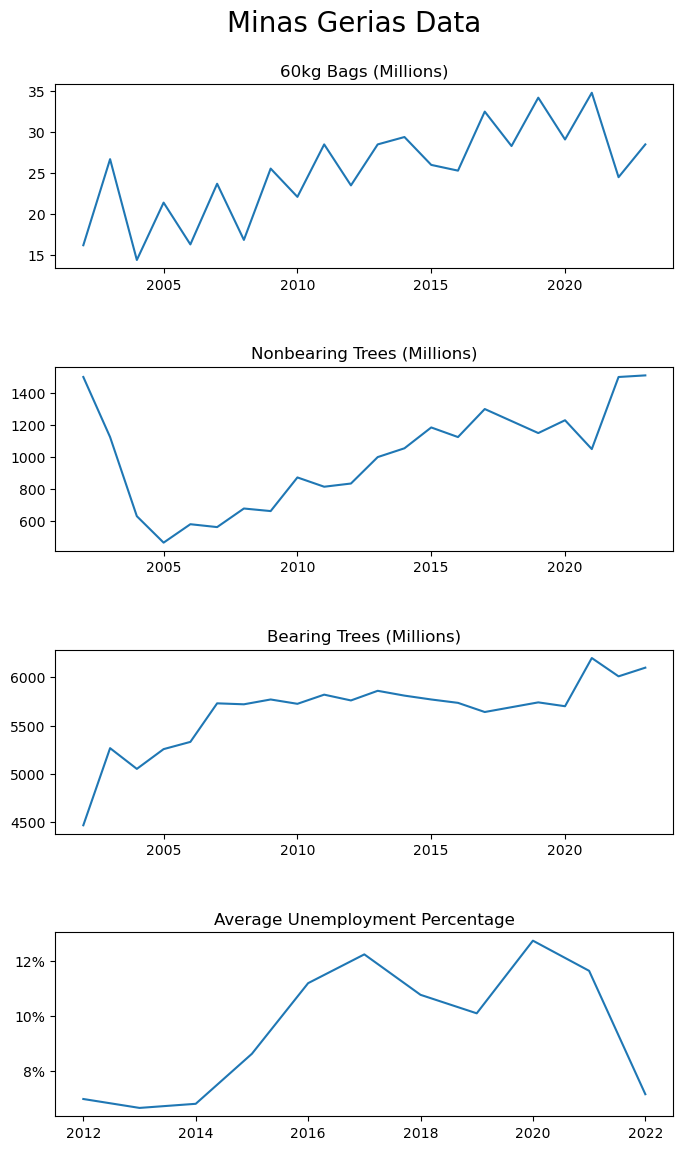

In [3]:
# How have harvest outcomes changed in Minas Gerais throughout the years

# read harvest data
harvest_data = pd.read_csv("../data/csv/br_final.csv")

# drop duplicate data (from 2014)
harvest_data = harvest_data.drop_duplicates()

# filter harvest data for Minas Gerais in 2022 and 2023 and keep columns (million_60kgs_bag, nonbear_mill_trees, bear_mill_trees, avg_unemp_perc)
mg_harvest = harvest_data[(harvest_data['subdivision'] == 'Minas Gerais')]

# Remove empty row for 2018 where mill trees data is not available
mg_harvest_data_filtered = mg_harvest.dropna(subset=['nonbear_mill_trees'])

# Creating 3 subplots
fig, ax = plt.subplots(4, figsize = (8, 12))
fig.tight_layout(pad=5)


# plot coffee harvest data (million_60kgs_bag, nonbear_mill_trees, and bear_mill_trees)
fig.suptitle('Minas Gerias Data', x = .5, y = 1, fontsize = 20)


ax[0].plot(mg_harvest.year, mg_harvest.million_60kgs_bag);
ax[0].set_title('60kg Bags (Millions)');

ax[1].plot(mg_harvest_data_filtered.year, mg_harvest_data_filtered.nonbear_mill_trees);
ax[1].set_title('Nonbearing Trees (Millions)');

ax[2].plot(mg_harvest_data_filtered.year, mg_harvest_data_filtered.bear_mill_trees);
ax[2].set_title('Bearing Trees (Millions)');

ax[3].plot(mg_harvest.year, mg_harvest.avg_unemp_perc);
ax[3].set_title('Average Unemployment Percentage')
# set y-axis as percentage
ax[3].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))




The production of coffee has been trending upward since 2002, but since 2016, the trend has stopped rising as steadily. The overall upward trend correlates with the uptrend of bearing trees. However, when looking at the average unemployment percentage data from 2016 forward, fluctuations of increasing and decreasing unemployment can be seen. This employment instabilaty could have potentially contributed to the plateau of coffee production seen from 2016 on.   <br><br>
From 2005 on, bearing trees also show an upward trend with the exception of the amount of trees from 2002-2005, which experienced a sharp decrease. This may have been due to a climatic or human-induced stressor that had an adverse affect on trees, such as deforestation or drought.

### 2. Harvest Outcomes Compared by Region
- Which region produced the most coffee?

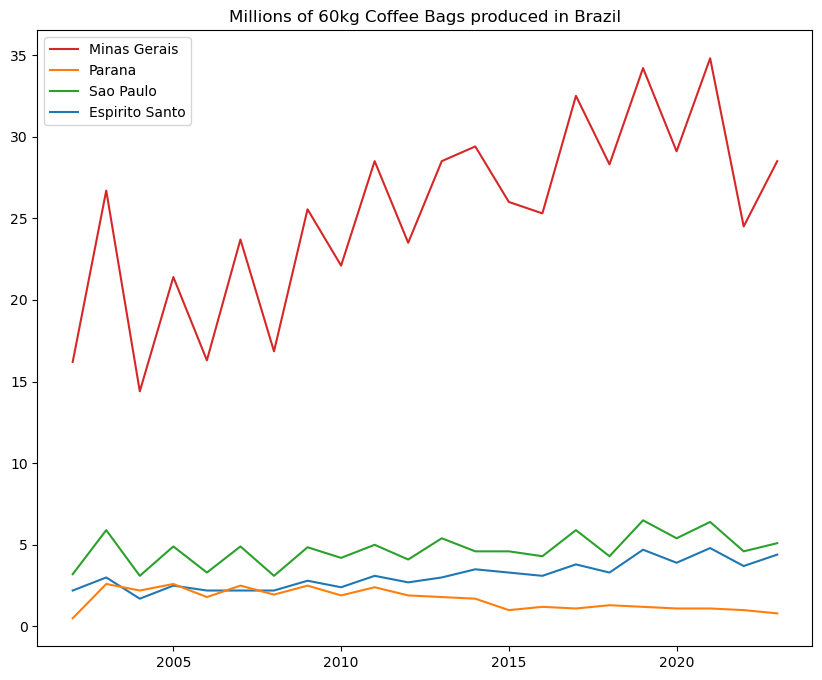

/var/folders/pg/vf32t04x6td1g_z1bnn3rg0c0000gn/T/ipykernel_77912/2990220155.py:23: FutureWarning: The provided callable <function sum at 0x10b370400> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  harvest_data_grouped_totals = harvest_data[harvest_data.type == 'Arabica'].groupby(['subdivision'], as_index = False).agg(
/var/folders/pg/vf32t04x6td1g_z1bnn3rg0c0000gn/T/ipykernel_77912/2990220155.py:23: FutureWarning: The provided callable <function mean at 0x10b3714e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  harvest_data_grouped_totals = harvest_data[harvest_data.type == 'Arabica'].groupby(['subdivision'], as_index = False).agg(


,subdivision,total_60kg_bags,avg_60kg_bags
1,Minas Gerais,556.30,25.29
3,Sao Paulo,103.65,4.71
0,Espirito Santo,68.50,3.11
2,Parana,36.15,1.64


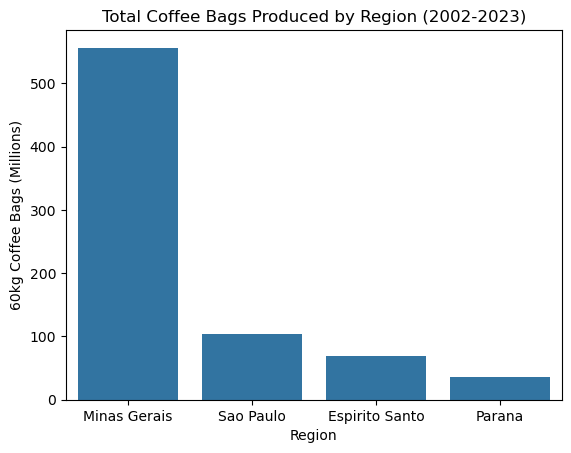

In [33]:

# get subdivisions 
subdiv = set(harvest_data['subdivision'])

# plot arabica coffee production for each region
plt.figure(figsize = (10,8));
for x in subdiv:
    plt.plot(harvest_data[(harvest_data.subdivision == f"{x}") & (harvest_data.type == 'Arabica')]['year'], harvest_data[(harvest_data.subdivision == f"{x}") & (harvest_data.type == 'Arabica')]['million_60kgs_bag'], label = f"{x}");
    plt.legend();

# reordering the labels 
handles, labels = plt.gca().get_legend_handles_labels() 
  
# specify order 
order = [3, 1, 2, 0] 
  
# pass handle & labels lists along with order 
plt.legend([handles[i] for i in order], [labels[i] for i in order]) 

plt.title('Millions of 60kg Coffee Bags produced in Brazil')
plt.show() 

# find total and averages of coffee produced per region
harvest_data_grouped_totals = harvest_data[harvest_data.type == 'Arabica'].groupby(['subdivision'], as_index = False).agg(
    total_60kg_bags = ('million_60kgs_bag', np.sum),
    avg_60kg_bags = ('million_60kgs_bag', np.mean),
)
harvest_data_grouped_totals = harvest_data_grouped_totals.round(2).sort_values('total_60kg_bags', ascending = False)


# find sum of bags produced outside of Minas Gerais
sum_bags = harvest_data_grouped_totals[harvest_data_grouped_totals['subdivision'] != 'Minas Gerais']['total_60kg_bags'].sum()

# find that sum's percentage of M.G. bags produced
perc_mg_prod = round((sum_bags/harvest_data_grouped_totals[harvest_data_grouped_totals.subdivision == 'Minas Gerais']['total_60kg_bags'])*100, 2)

# plot bag totals per region
ax = sns.barplot(x="subdivision", y="total_60kg_bags", data=harvest_data_grouped_totals);
ax.set(xlabel='Region', ylabel='60kg Coffee Bags (Millions)', title='Total Coffee Bags Produced by Region (2002-2023)');

display(harvest_data_grouped_totals)



Over the past two decades, Minais Gerais has produced more coffee than Sao Paulo, Espirito Santo, and Parana regions which have produced a combined 37% of the total bags produced in Minas Gerais. Minas Gerais also has a significantly higher average of 60kg bags produced per year, at around 25 million bags compared to the other regions ranging yearly averages between 1 and 5 million bags. 


### 3. How has unemployment changed in the various coffee-producing regions of Brazil?

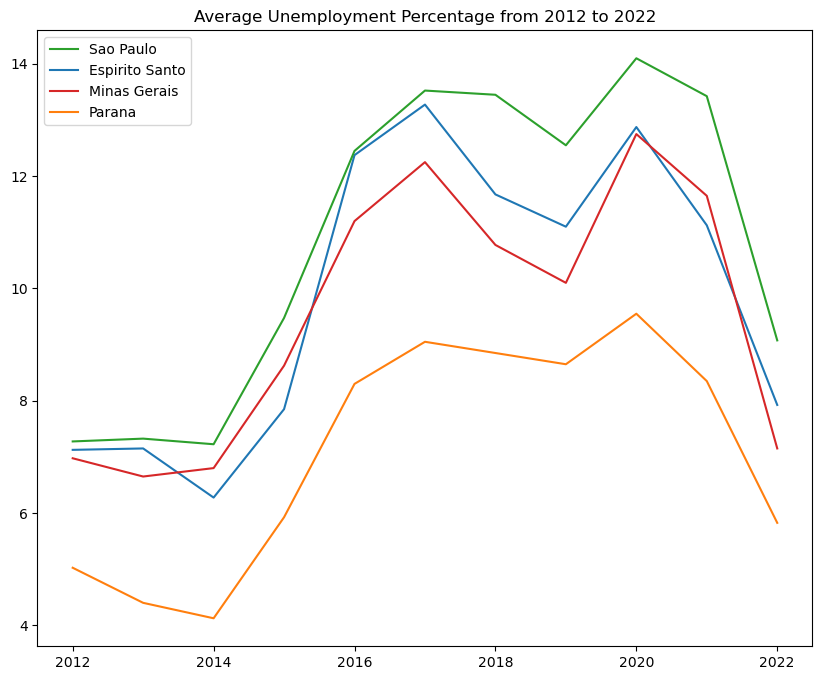

/var/folders/pg/vf32t04x6td1g_z1bnn3rg0c0000gn/T/ipykernel_77912/1639679006.py:20: FutureWarning: The provided callable <function mean at 0x10b3714e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_unemp = harvest_data[(harvest_data.type == 'Arabica') & (harvest_data.year >= 2012)].groupby(['subdivision'], as_index = False).agg(


,subdivision,avg_unemp_rate
3,Sao Paulo,10.90
0,Espirito Santo,9.89
1,Minas Gerais,9.54
2,Parana,7.10


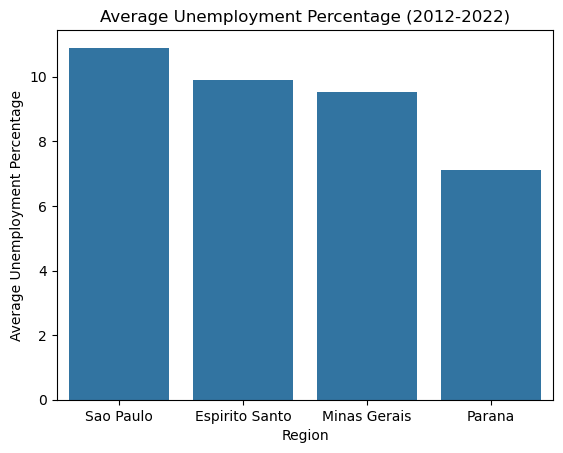

In [34]:
# plot unemployment for each subdivision from 2012 forward
plt.figure(figsize = (10,8));
for x in subdiv:
    plt.plot(harvest_data[(harvest_data.subdivision == f"{x}") & (harvest_data.type == 'Arabica') & (harvest_data.year >= 2012)]['year'], harvest_data[(harvest_data.subdivision == f"{x}") & (harvest_data.type == 'Arabica') & (harvest_data.year >= 2012)]['avg_unemp_perc'], label = f"{x}");
    plt.legend();

# reordering the labels 
handles, labels = plt.gca().get_legend_handles_labels() 
  
# specify order 
order = [2, 0, 3, 1] 
  
# pass handle & labels lists along with order 
plt.legend([handles[i] for i in order], [labels[i] for i in order]) 

plt.title('Average Unemployment Percentage from 2012 to 2022')
plt.show() 

# find average unemp from 2012 - 2022 for each region
avg_unemp = harvest_data[(harvest_data.type == 'Arabica') & (harvest_data.year >= 2012)].groupby(['subdivision'], as_index = False).agg(
    avg_unemp_rate = ('avg_unemp_perc', np.mean)
)
avg_unemp = avg_unemp.round(2).sort_values('avg_unemp_rate', ascending = False)

display(avg_unemp)

# plot avg unemp per region
ax = sns.barplot(x="subdivision", y="avg_unemp_rate", data=avg_unemp);
ax.set(xlabel='Region', ylabel='Average Unemployment Percentage', title='Average Unemployment Percentage (2012-2022)');


The unemployment rate in each region follows a similar trend with a sharp increase in unemployment from 2014 to 2017. From 2017 to 2020, there were fluctuations in unemployment until a sharp decrease began from 2020 to 2022. Sao Paulo appears to have the highest unemployment rate out of all regions at almost 11% with Parana having the lowest at around 7%.

### 4. How have weather outcomes changed for Minas Gerais throughout the years?

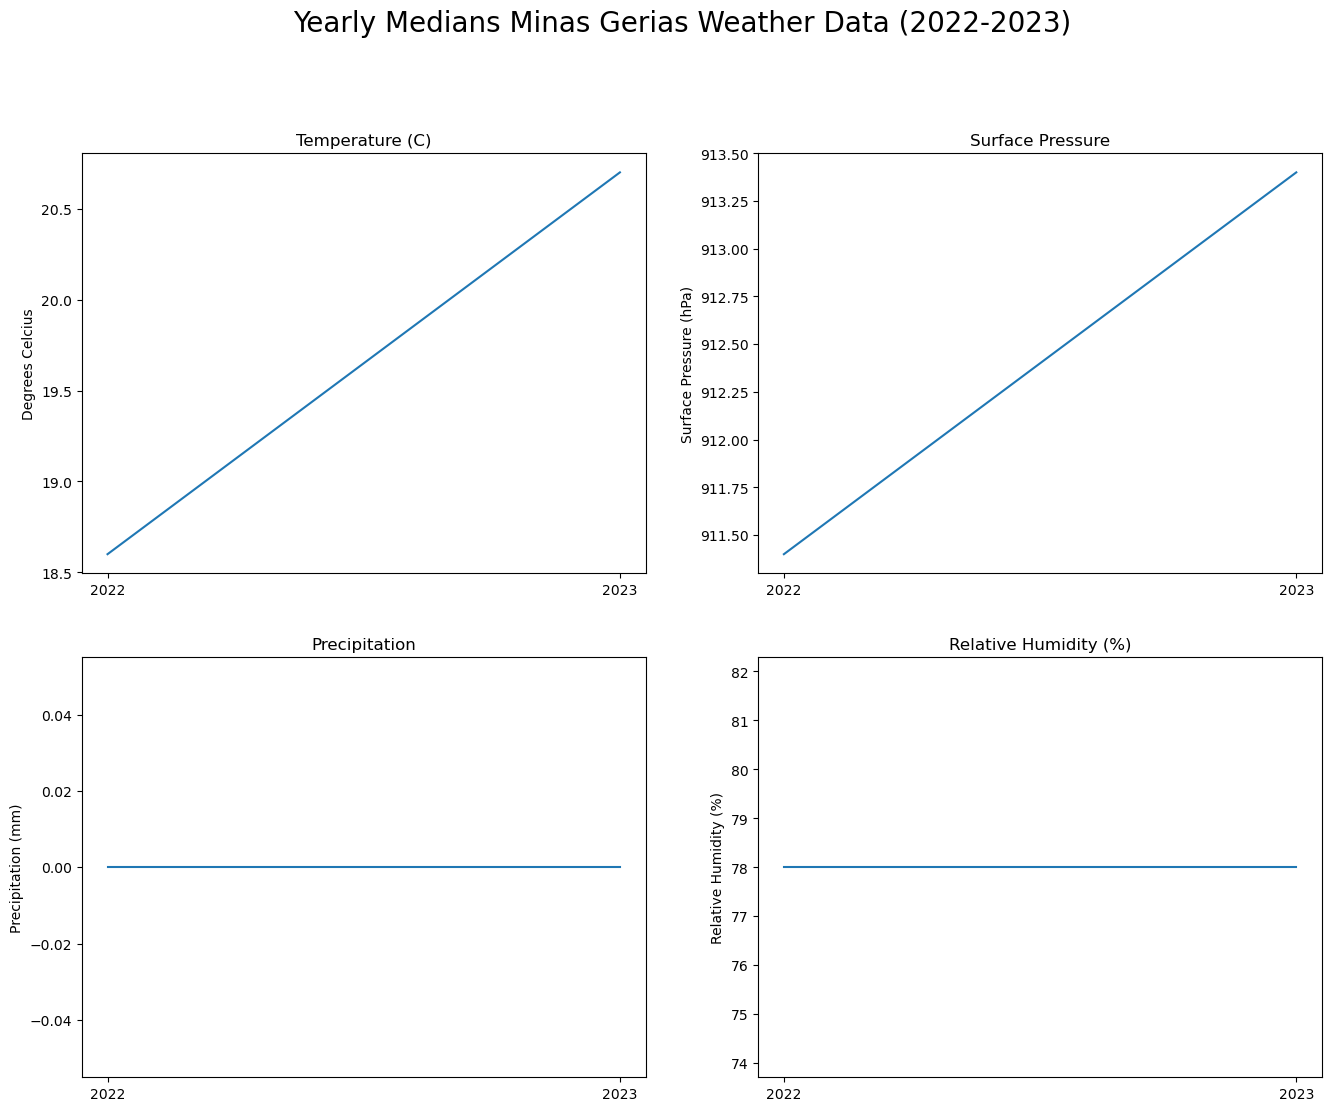

In [78]:
# plot weather outcomes in Minas
fig, ax = plt.subplots(2, 2, figsize = (16, 12))

# plot weather data
fig.suptitle('Yearly Medians Minas Gerias Weather Data (2022-2023)', x = .5, y = 1, fontsize = 20)

# create yearly data variable
yearly_data = pd.read_csv('../data/csv/yearly_data_weather_harvest.csv')

#convert year type to string
yearly_data.Year = yearly_data.Year.astype(str)

# plot temp
ax[0, 0].plot(yearly_data.Year, yearly_data['Temperature (C)']);
ax[0, 0].set_title('Temperature (C)');
ax[0, 0].set_ylabel('Degrees Celcius');

# plot surface pressure
ax[0, 1].plot(yearly_data.Year, yearly_data['Surface Pressure (hPa)']);
ax[0, 1].set_title('Surface Pressure');
ax[0, 1].set_ylabel('Surface Pressure (hPa)');

# plot precipitation
ax[1, 0].plot(yearly_data.Year, yearly_data['Precipitation (mm)']);
ax[1, 0].set_title('Precipitation');
ax[1, 0].set_ylabel('Precipitation (mm)');

# plot relative humidity
ax[1, 1].plot(yearly_data.Year, yearly_data['Relative Humidity (%)']);
ax[1, 1].set_title('Relative Humidity (%)');
ax[1, 1].set_ylabel('Relative Humidity (%)');

The median yearly values of Temperature and Surface Pressure increased from 2022 to 2023 while Precipitation and Relative humidity medians stayed stagnant.